In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 


Bad key "text.kerning_factor" on line 4 in
E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
room1 = pd.read_csv('G:/CDO/狗熊会机器学习/TASK7--刘嘉玲/863.tsv', names=['room_id', 'type', 'time_stamp',
                                      'act_type', 'user_name', 'content', 
                                      'Unknown_1', 'Unknown_2', 'year', 
                                      'month', 'day', 'hour', 'minu', 'sec'], sep='\t')
room2 = pd.read_csv('G:/CDO/狗熊会机器学习/TASK7--刘嘉玲/1038864.tsv', names=['room_id', 'type', 'time_stamp',
                                      'act_type', 'user_name', 'content', 
                                      'Unknown_1', 'Unknown_2', 'year', 
                                      'month', 'day', 'hour', 'minu', 'sec'], sep='\t')

room1 = room1[['room_id', 'type', 'time_stamp', 'act_type', 
             'user_name']]
room2 = room2[['room_id', 'type', 'time_stamp', 'act_type', 
             'user_name']]

room1_by_user = room1.groupby('user_name')
room2_by_user = room2.groupby('user_name')

In [3]:
latest_date = max(max(room2.time_stamp), max(room1.time_stamp))
user_list_1 = []
Recency_1 = []
Frequency_1 = []
Monetary_1 = []

for user, group in room1_by_user:
    # 当只有一个操作时无法计算频度
    count = len(group)
    if count > 1 :
        latest_user_date = group.time_stamp.max()
        min_user_date = group.time_stamp.min()
        time_diff = (latest_date - latest_user_date)/3600
        ac_fre = (latest_user_date - min_user_date)/count/3600
        user_list_1.append(user)
        Recency_1.append(time_diff)
        Frequency_1.append(ac_fre)
        Monetary_1.append(count)
    else:
        pass

user_list_2 = []
Recency_2 = []
Frequency_2 = []
Monetary_2 = []
for user, group in room2_by_user:
    # 当只有一个操作时无法计算频度
    count = len(group)
    if count > 1 :
        latest_user_date = group.time_stamp.max()
        min_user_date = group.time_stamp.min()
        time_diff = (latest_date - latest_user_date)/3600
        ac_fre = (latest_user_date - min_user_date)/count/3600
        user_list_2.append(user)
        Recency_2.append(time_diff)
        Frequency_2.append(ac_fre)
        Monetary_2.append(count)
    else:
        pass

data_1 = pd.DataFrame({'user_name':user_list_1, 'Recency':Recency_1,
                       'Frequency':Frequency_1, 'Monetary':Monetary_1})
data_2 = pd.DataFrame({'user_name':user_list_2, 'Recency':Recency_2,
                       'Frequency':Frequency_2, 'Monetary':Monetary_2})

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 

In [5]:
X_1 = data_1.iloc[:, 1:].values
X_2 = data_2.iloc[:, 1:].values

X_1 = (X_1 - X_1.mean(axis=0)) / X_1.std(axis=0)
X_2 = (X_2 - X_2.mean(axis=0)) / X_2.std(axis=0)

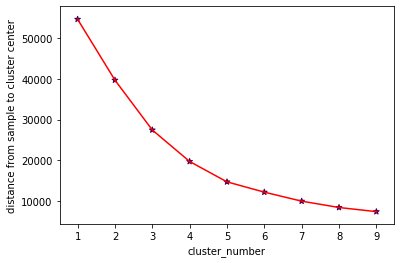

In [6]:
loss = []

for k in range(1, 10):
    kmeans_1 = KMeans(n_clusters=k, n_init=30)
    kmeans_1.fit_predict(X_1)
    loss.append(kmeans_1.inertia_)

figure = plt.figure(1)
plt.plot(np.arange(1, len(loss)+1), loss, 'r-')
plt.scatter(np.arange(1, len(loss)+1), loss, marker='*', c=[1]*len(loss))
plt.xlabel('cluster_number')
plt.ylabel('distance from sample to cluster center')
plt.show() 

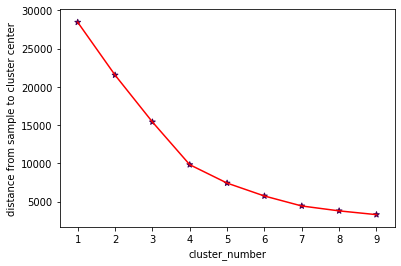

In [9]:
loss = []
for k in range(1, 10):
    kmeans_2 = KMeans(n_clusters=k, n_init=30)
    kmeans_2.fit_predict(X_2)
    loss.append(kmeans_2.inertia_)
figure = plt.figure(1)
plt.plot(np.arange(1, len(loss)+1), loss, 'r-')
plt.scatter(np.arange(1, len(loss)+1), loss, marker='*', c=[1]*len(loss))
plt.xlabel('cluster_number')
plt.ylabel('distance from sample to cluster center')
plt.show() 

In [7]:
kmeans_1 = KMeans(n_clusters=3, n_init=30)
pred_1 = kmeans_1.fit_predict(X_1)
print(kmeans_1.cluster_centers_) 

[[-0.62800663 -0.26735418  0.09312988]
 [ 1.24748694 -0.32438291 -0.08813495]
 [-0.52578215  2.48474977 -0.22871145]]


In [8]:
for i in range(3):
    perc = len(pred_1[pred_1 == i]) / len(pred_1) 
    print("第%d类用户占比%0.4f"%(i+1, perc)) 

第1类用户占比0.5670
第2类用户占比0.3292
第3类用户占比0.1039


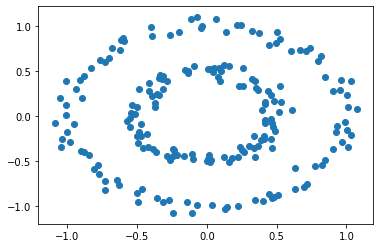

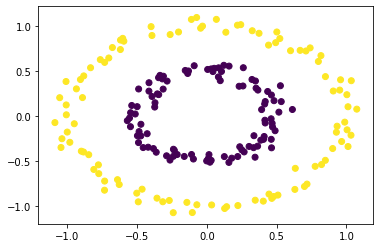

In [16]:
from sklearn import datasets
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

n_samples = 200
#生成数据
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
 
X = []
y = []
pos = noisy_circles[0]
for p in pos:
    X.append(p[0])
    y.append(p[1])
 
plt.scatter(X, y)
plt.show()
 
sc = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
 
sc_clusters2 = sc.fit_predict(noisy_circles[0])
 
 
# plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c=sc_clusters2)
plt.scatter(X,y, c=sc_clusters2)
 
plt.show()